Projeto Validação de dados

Objetivo Limpeza e tranformação dos dados

In [117]:
# Importando bibliotecas para modelagem de dados
import pandas as pd
import numpy as np

In [118]:
# Abrindo base de dados 
df = pd.read_excel(r'C:\\Users\\Usuário\\Downloads\\vendas X.xlsx')
df.head() # Exibir 5 linhas 

,Id da venda,Data da Venda,Quantidade,Preço Unitário,Total de Venda,CPF
0,1,2023-02-12 00:00:00,5.0,20,100,572.833.820-89
1,2,32/13/2023,3.0,15,45,502.741.840-01
2,3,2024-09-05 00:00:00,2.0,25,50,213.124.600-59
3,4,2023-05-20 00:00:00,7.0,-10,-70,147.139.910-90
4,5,2023-04-15 00:00:00,10.0,30,300,554.270.590-16


In [119]:
# Quantidade de linhas e colunas
df.shape

(20, 6)

In [120]:
# Verificando quantidade de duplicatas
df.drop_duplicates().count()

Id da venda       20
Data da Venda     20
Quantidade        18
Preço Unitário    20
Total de Venda    20
CPF               19
dtype: int64

In [121]:
# Salvando a base sem duplicatas
df.drop_duplicates(inplace=True)

In [122]:
# Verificando dados faltantes
df.isnull().sum()

Id da venda       0
Data da Venda     0
Quantidade        2
Preço Unitário    0
Total de Venda    0
CPF               1
dtype: int64

In [123]:
# Substituir valores faltantes coluna 'CPF' preencher com '0'
df['CPF'] = df['CPF'].fillna(0)

In [124]:
# Verificar a frequência de valores únicos
valores_frequencia = df['CPF'].value_counts().reset_index()
valores_frequencia.columns = ['cpf', 'frequência']
print(valores_frequencia)


               cpf  frequência
0   572.833.820-89           2
1        587272390           1
2   565.394.420-33           1
3   171.504.970-55           1
4   709.972.620-01           1
5   298.690.610-95           1
6                0           1
7   444.953.680-01           1
8   075.400.780-49           1
9        733204400           1
10  502.741.840-01           1
11  776.823.690-43           1
12  746.388.180-64           1
13  799.857.930-72           1
14  118.658.030-57           1
15  554.270.590-16           1
16  147.139.910-90           1
17  213.124.600-59           1
18     54180364085           1


In [125]:
# Remover frequência duplicada coluna 'CPF'
df.drop_duplicates(subset=['CPF'], keep='first', inplace=True)


In [126]:
# Padrão esperado para CPF: XXX.XXX.XXX-XX
padrao_cpf = r'^\d{3}\.\d{3}\.\d{3}-\d{2}$'

# Verificar quais CPFs não seguem o padrão
df['Nao_Padrao'] = df['CPF'].str.match(padrao_cpf, na=False)

# Filtrar os dados que NÃO estão no padrão
dados_fora_do_padrao = df[~df['Nao_Padrao']]
print(f"Dados que não seguem o padrão esperado:\n{dados_fora_do_padrao[['CPF']]}")

Dados que não seguem o padrão esperado:
            CPF
9     733204400
10    587272390
13            0
19  54180364085


In [127]:
# Função para calcular os dígitos faltantes
def calcular_digitos_faltantes(cpf):
    cpf_str = str(cpf) # Converte o CPF para string
    num_digitos = len(cpf_str) # Contar quantidade de dígito
    
    if num_digitos < 11:  # Verifica se faltam dígitos
        digitos_faltantes = 11 - num_digitos  # Quantidade de dígitos faltantes
        return f"{digitos_faltantes} dígitos faltantes"
    else:
        return "CPF completo"

# Aplicar a função para calcular os dígitos faltantes
df['Dígitos_Faltantes'] = df['CPF'].apply(calcular_digitos_faltantes)

# Filtrar CPFs que possuem dígitos faltantes
filtros = df[df['Dígitos_Faltantes'] != "CPF completo"]

# Mostrar o resultado
print(filtros[['CPF', 'Dígitos_Faltantes']])

          CPF     Dígitos_Faltantes
9   733204400   2 dígitos faltantes
10  587272390   2 dígitos faltantes
13          0  10 dígitos faltantes


In [128]:
# Função para verificar se o CPF tem 9 dígitos e calcular a soma do dígito faltante
def calcular_peso_cpf(cpf):
    cpf_str = str(cpf)  # Converte o CPF para string
    
    if len(cpf_str) == 9:  # Verifica se o CPF tem exatamente 9 dígitos
        pesos = [10, 9, 8, 7, 6, 5, 4, 3, 2] # Pesos para soma
        soma = sum(int(cpf_str[i]) * pesos[i] for i in range(9)) # Loop para interação da soma
        return soma
    else:
        return None  # Retorna None se o CPF não tiver 9 dígitos

# Criar a coluna 'soma'
df['soma'] = df['CPF'].apply(calcular_peso_cpf)

# Filtrar apenas os CPFs não padrão, coluna soma
nao_padrao = df[df['soma'].notnull()]

# Mostrar apenas os CPFs não padrão com a soma
print(nao_padrao[['soma']])


     soma
9   171.0
10  283.0


In [129]:
# Função para calcular o resto
def calcular_digito(resto):
    if resto < 2:
        return 0
    else:
        return 11 - resto

# Calcular o resto da divisão por 11
df['Resto'] = df['soma'] % 11

# Criar coluna para armazenar o digito
df['Digito'] = df['Resto'].apply(calcular_digito)

# Filtrar apenas os digitos não nulos
digito = df[df['Digito'].notnull()]

# Mostrar o resultado
print(digito[['Resto', 'Digito']])

    Resto  Digito
9     6.0     5.0
10    8.0     3.0


In [130]:
# Certificar-se de que os valores de 'Digito' não são NaN antes de concatenar
df['Digito'] = df['Digito'].fillna(0).astype(int)  # Substitui NaN por 0 e converte para inteiro

# Concatenar o CPF e o dígito como string
df['add_digito'] = df['CPF'].astype(str) + df['Digito'].astype(str)

# Filtrar apenas coluna 'Digito' diferente de  0
completando = df[df['Digito'] != 0]

# Mostrar o resultado
print(completando[['CPF','add_digito']])

          CPF  add_digito
9   733204400  7332044005
10  587272390  5872723903


In [131]:
# Certificando que a correção dos digitos anteriores e prosseguindo
# Função para calcular os dígitos faltantes
def calcular_digitos_faltantes(cpf):
    cpf_str = str(cpf) # Converte o CPF para string
    num_digitos = len(cpf_str) # Contar quantidade de dígito
    
    if num_digitos < 11:  # Verifica se faltam dígitos
        digitos_faltantes = 11 - num_digitos  # Quantidade de dígitos faltantes
        return f"{digitos_faltantes} dígitos faltantes"
    else:
        return "CPF completo"

# Criar coluna e aplicar a função para calcular os dígitos faltantes
df['Dígitos_Faltantes'] = df['add_digito'].apply(calcular_digitos_faltantes)


# Filtrar CPFs que possuem dígitos faltantes
filtros = df[df['Dígitos_Faltantes'] != "CPF completo"]

# Mostrar o resultado
print(filtros[['add_digito', 'Dígitos_Faltantes']])


    add_digito    Dígitos_Faltantes
9   7332044005  1 dígitos faltantes
10  5872723903  1 dígitos faltantes
13          00  9 dígitos faltantes


In [132]:
# Função para verificar se o CPF tem 10 dígitos e cálcular a soma do dígito faltante
def calcular_peso_cpf(cpf):
    cpf_str = str(cpf)  # Converte o CPF para string
    
    if len(cpf_str) == 10:  # Verifica se o CPF tem exatamente 10 dígitos
        pesos = [11, 10, 9, 8, 7, 6, 5, 4, 3, 2] # pesos para soma
        soma = sum(int(cpf_str[i]) * pesos[i] for i in range(10)) # loop para interação da soma
        return soma
    else:
        return None  # Retorna None se o CPF não tiver 10 dígitos

# Criar a coluna 'soma2' para identificar CPFs com 10 dígitos
df['soma2'] = df['add_digito'].apply(calcular_peso_cpf)

# Filtrar apenas os CPFs não padrão coluna 'soma2'
nao_padrao = df[df['soma2'].notnull()]

# Mostrar apenas os CPFs não padrão e a soma2
print(nao_padrao[['soma2']])


    soma2
9   204.0
10  332.0


In [133]:
# Função para calcular o resto
def calcular_digito(resto):
    if resto < 2:
        return 0
    else:
        return 11 - resto

# Calcular o resto da divisão por 11
df['Resto'] = df['soma2'] % 11

# Criar coluna para armazenar o digito
df['Digito'] = df['Resto'].apply(calcular_digito)

# Filtrar apenas coluna 'Digito' não nulos
resto = df[df['Digito'].notnull()]

# Mostrar o resultado
print(resto[['Resto', 'Digito']])


    Resto  Digito
9     6.0     5.0
10    2.0     9.0


In [134]:
# Certificar-se de que os valores de 'Digito' não são NaN antes de concatenar
df['Digito'] = df['Digito'].fillna(0).astype(int)  # Substitui NaN por 0 e converte para inteiro

# Concatenar o CPF e o dígito como string
df['add_digito2'] = df['add_digito'].astype(str) + df['Digito'].astype(str)

# Filtrar apenas coluna 'Digito' diferentes de 0
completando = df[df['Digito'] != 0]

# Mostrar o resultado
print(completando[['add_digito','add_digito2']])

    add_digito  add_digito2
9   7332044005  73320440055
10  5872723903  58727239039


In [137]:
# Verificar com ficou a correção dos dígitos faltantes
# Cria uma tabela comparativa com valores originais e modificados lado a lado
tabela_comparativa = df[['CPF', 'add_digito2']][df['CPF'] != df['add_digito2']]
print(tabela_comparativa)


               CPF       add_digito2
0   572.833.820-89  572.833.820-8900
1   502.741.840-01  502.741.840-0100
2   213.124.600-59  213.124.600-5900
3   147.139.910-90  147.139.910-9000
4   554.270.590-16  554.270.590-1600
5   118.658.030-57  118.658.030-5700
6   799.857.930-72  799.857.930-7200
7   746.388.180-64  746.388.180-6400
8   776.823.690-43  776.823.690-4300
9        733204400       73320440055
10       587272390       58727239039
11  075.400.780-49  075.400.780-4900
12  444.953.680-01  444.953.680-0100
13               0               000
14  298.690.610-95  298.690.610-9500
15  709.972.620-01  709.972.620-0100
16  171.504.970-55  171.504.970-5500
18  565.394.420-33  565.394.420-3300
19     54180364085     5418036408500


In [140]:
# Função para formatar o CPF com pontos e traço, removendo os dois últimos zeros
def formatar_cpf(cpf):
    cpf_str = str(cpf)  # Converte para string
    
    # Remove os dois últimos zeros, se houver
    if cpf_str.endswith('00'):
        cpf_str = cpf_str[:-2]  # Remove os dois últimos caracteres
    
    # Verifica se o CPF tem exatamente 11 dígitos após a remoção
    if len(cpf_str) == 11:
        return f"{cpf_str[:3]}.{cpf_str[3:6]}.{cpf_str[6:9]}-{cpf_str[9:]}"
    else:
        # Retorna o CPF original se tiver mais ou menos de 11 dígitos
        return cpf_str

# Criar a coluna 'CPF_Formatado' com o CPF ajustado
df['CPF_Formatado'] = df['add_digito2'].apply(formatar_cpf)

# Mostrar o resultado
print(df[['add_digito2', 'CPF_Formatado']].head(10))


        add_digito2   CPF_Formatado
0  572.833.820-8900  572.833.820-89
1  502.741.840-0100  502.741.840-01
2  213.124.600-5900  213.124.600-59
3  147.139.910-9000  147.139.910-90
4  554.270.590-1600  554.270.590-16
5  118.658.030-5700  118.658.030-57
6  799.857.930-7200  799.857.930-72
7  746.388.180-6400  746.388.180-64
8  776.823.690-4300  776.823.690-43
9       73320440055  733.204.400-55


In [141]:
df.columns

Index(['Id da venda', 'Data da Venda', 'Quantidade', 'Preço Unitário',
       'Total de Venda', 'CPF', 'Nao_Padrao', 'Dígitos_Faltantes', 'soma',
       'Resto', 'Digito', 'add_digito', 'soma2', 'add_digito2',
       'CPF_Formatado'],
      dtype='object')

In [142]:
# Excluindo colunas
df.drop(columns = ['CPF', 'Nao_Padrao', 'Dígitos_Faltantes', 'soma',
       'Resto', 'Digito', 'add_digito', 'soma2', 'add_digito2'], inplace= True)

In [143]:
# Renomenado coluna específica
df.rename(columns = {'CPF_Formatado':'CPF', 'Id da venda':'ID da Venda'}, inplace = True)

In [145]:
# Verificando valores únicos
df['Quantidade'].unique()

array([ 5.,  3.,  2.,  7., 10., nan,  4.,  6.,  8.,  9.])

In [146]:
# Substituir valores nan
df['Quantidade'] = df['Quantidade'].fillna(0)

In [147]:
# Identificar valores discrepântes refente a Quantidade
media = df['Quantidade'].mean() # cálculo da média
desvio_padrao = df['Quantidade'].std() # cálculo do desvio

limites_superior = media + 3 * desvio_padrao
limites_inferior = media - 3 * desvio_padrao

# Filtrar os limites superior e inferior
outliers = df[(df['Quantidade'] > limites_superior) | (df['Quantidade'] < limites_inferior)]
print(outliers)


Empty DataFrame
Columns: [ID da Venda, Data da Venda, Quantidade, Preço Unitário, Total de Venda, CPF]
Index: []


In [148]:
# Exibir estatísticas descritivas sobre a coluna 'Quantidade'
df['Quantidade'].describe()

count    19.000000
mean      4.631579
std       2.947891
min       0.000000
25%       2.500000
50%       4.000000
75%       7.000000
max      10.000000
Name: Quantidade, dtype: float64

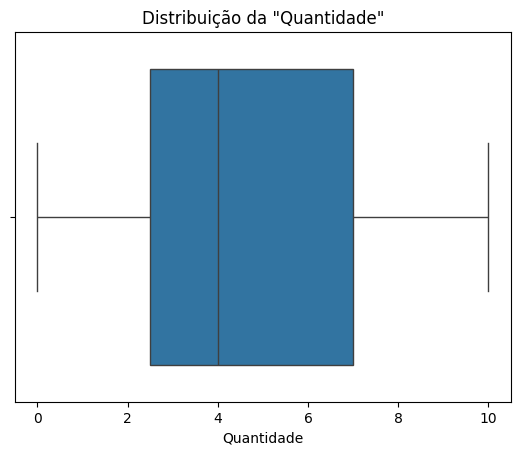

In [149]:
# Importando bibliotecas para visualização de gráfico
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de caixa para detectar outliers(Discrepâncias) 
sns.boxplot(x=df['Quantidade'])
plt.title('Distribuição da "Quantidade"')
plt.show()

In [150]:
# Verificando valores únicos coluna 'Preço Unitário'
df['Preço Unitário'].unique()

array([ 20,  15,  25, -10,  30,  18, 500,  10,   0,  22, -15,  28,   8,
        21,  23,  12,  31], dtype=int64)

In [156]:
# Remover linhas onde 'Preço Unitário' é negativo ou igual a zero
df = df[df['Preço Unitário'] > 0]

# Mostrar o resultado
df['Preço Unitário'].unique()

array([ 20,  15,  25,  30,  18, 500,  10,  22,  28,   8,  21,  23,  12,
        31], dtype=int64)

In [159]:
# Identificar valores discrepântes refente a Preço Unitário
media = df['Preço Unitário'].mean()
desvio_padrao = df['Preço Unitário'].std()

limites_superior = media + 3 * desvio_padrao
limites_inferior = media - 3 * desvio_padrao

outliers = df[(df['Preço Unitário'] > limites_superior) | (df['Preço Unitário'] < limites_inferior)]
outliers

,ID da Venda,Data da Venda,Quantidade,Preço Unitário,Total de Venda,CPF
6,7,2023-11-25 00:00:00,4.0,500,2000,799.857.930-72


In [160]:
# Exibir estatísticas descritivas
df['Preço Unitário'].describe()

count     16.00000
mean      50.50000
std      120.08386
min        8.00000
25%       15.00000
50%       21.50000
75%       28.50000
max      500.00000
Name: Preço Unitário, dtype: float64

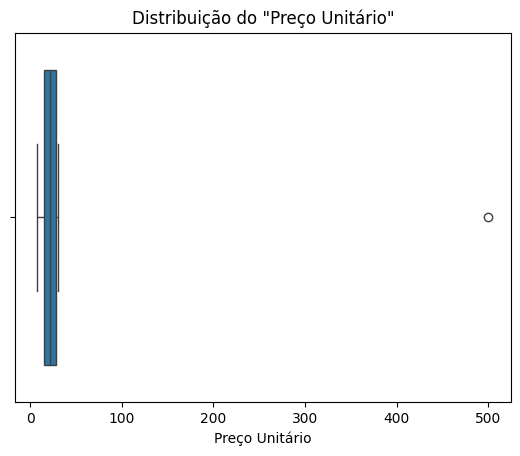

In [161]:
# Gráfico de caixa para detectar outliers(Discrepâncias)
sns.boxplot(x=df['Preço Unitário'])
plt.title('Distribuição do "Preço Unitário"')
plt.show()


In [162]:
# Verificar se o cálculo do 'Total de Venda' está correto
df['Total_Calculado'] = df['Quantidade'] * df['Preço Unitário']

# Identificar onde o 'Total de Venda' está incorreto
inconsistencias = df[df['Total de Venda'] != df['Total_Calculado']]

# Exibir inconsistências
inconsistencias[['Quantidade', 'Preço Unitário',
       'Total de Venda','Total_Calculado']]

,Quantidade,Preço Unitário,Total de Venda,Total_Calculado
5,0.0,18,90,0.0
14,0.0,21,105,0.0


In [163]:
# Ver todas as colunas
df.columns

Index(['ID da Venda', 'Data da Venda', 'Quantidade', 'Preço Unitário',
       'Total de Venda', 'CPF', 'Total_Calculado'],
      dtype='object')

In [164]:
# Excluir coluna expecífica
df.drop(columns = ['Total de Venda'], inplace = True)

In [165]:
# Renomenado coluna específica
df.rename(columns = {'Total_Calculado':'Total de Vendas'}, inplace = True)

In [166]:
# Organizando as colunas
df = df[['ID da Venda','CPF', 'Data da Venda', 'Quantidade', 'Preço Unitário', 'Total de Vendas'
       ]]
df.head(1)

,ID da Venda,CPF,Data da Venda,Quantidade,Preço Unitário,Total de Vendas
0,1,572.833.820-89,2023-02-12 00:00:00,5.0,20,100.0


In [167]:
# Verificar a frequência de data
valores_frequencia = df['Data da Venda'].value_counts().reset_index()
valores_frequencia.columns = ['Data', 'Frequência']
print(valores_frequencia)

                   Data  Frequência
0   2023-02-12 00:00:00           1
1            32/13/2023           1
2   2024-09-05 00:00:00           1
3   2023-04-15 00:00:00           1
4   2923-07-18 00:00:00           1
5   2023-11-25 00:00:00           1
6   2023-09-30 00:00:00           1
7   2023-11-11 00:00:00           1
8   2023-05-04 00:00:00           1
9   2024-02-05 00:00:00           1
10           33/13/2023           1
11  2024-04-20 00:00:00           1
12  2024-05-21 00:00:00           1
13  2024-11-05 00:00:00           1
14  2024-11-07 00:00:00           1
15  2024-11-08 00:00:00           1


In [168]:
# Usando pd.to_datetime para converter strings em datas
# O errors='coerce' vai converter datas inválidas para NaT (Not a Time)
df['Data da Venda'] = pd.to_datetime(df['Data da Venda'], errors='coerce')

In [169]:
# Excluindo as linhas onde as datas são NaT
df = df.dropna(subset=['Data da Venda'])

In [170]:
# Formatando a data no formato 'dd/mm/aaaa'
df['Data da Venda'] = df['Data da Venda'].dt.strftime('%d/%m/%Y')

# Exibir 
df['Data da Venda'].head(2)

0    12/02/2023
2    05/09/2024
Name: Data da Venda, dtype: object

In [172]:
df

,ID da Venda,CPF,Data da Venda,Quantidade,Preço Unitário,Total de Vendas
0,1,572.833.820-89,12/02/2023,5.0,20,100.0
2,3,213.124.600-59,05/09/2024,2.0,25,50.0
4,5,554.270.590-16,15/04/2023,10.0,30,300.0
6,7,799.857.930-72,25/11/2023,4.0,500,2000.0
7,8,746.388.180-64,30/09/2023,6.0,10,60.0
9,10,733.204.400-55,11/11/2023,8.0,22,176.0
11,12,075.400.780-49,04/05/2023,2.0,28,56.0
12,13,444.953.680-01,05/02/2024,7.0,8,56.0
14,15,298.690.610-95,20/04/2024,0.0,21,0.0
15,16,709.972.620-01,21/05/2024,8.0,23,184.0


In [171]:
# Salvar o DataFrame atualizado em um arquivo Excel
df.to_excel('dados_atualizados.xlsx', index=False)